# Contents
#### Importing necessary Libraries & Dataframe
#### PII Check
#### Crosstab b/w Regional customer behaviour 
#### Exclusion flag for low-activity customer
#### Data Profiling
#### Visualizations
#### Statistical Analysis
#### Crosstab b/w Customer profile with department & region
# Part 1

## Step 1: Import Dataframe

### Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing Dataframe

In [2]:
# Create path

path = r'C:\Users\aleen\OneDrive\Desktop\Aleena\CF assignments\Data Immersion\Achievement 4\23-04-2023 Instacart Basket Analysis'

In [ ]:
# Import merged_data.pkl as df_merged

df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data.pkl'))

In [4]:
# Check the data

df_merged.shape

(32404859, 33)

In [5]:
df_merged.head(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,Number of Dependants,Marital Status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Step 2:  PII Check

In [6]:
# Dropping column 'First Name' & 'Last Name' for data security

df_merged.drop(['First Name', 'Last Name'], axis = 1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_frequency,order_frequency_flag,Gender,STATE,Age,date_joined,Number of Dependants,Marital Status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151


## Step 3: Regional Customer Behavior

### Creating column 'region' based on column 'STATE'

In [7]:
# Create an empty list for 'region' column

region = []

In [8]:
# Divide States into Regions according to 'List of regions of the United States' wikipedia entry

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# Use the loc() to determine the region for each row in dataframe

df_merged.loc[df_merged['STATE'].isin(Northeast), 'region'] = 'Northeast'
df_merged.loc[df_merged['STATE'].isin(Midwest), 'region'] = 'Midwest'
df_merged.loc[df_merged['STATE'].isin(South), 'region'] = 'South'
df_merged.loc[df_merged['STATE'].isin(West), 'region'] = 'West'

In [12]:
# Check the 'region' column for results

df_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [13]:
# Check the dataframe

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,STATE,Age,date_joined,Number of Dependants,Marital Status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


### Crosstab between 'region' and 'spending flag'

In [14]:
# Check for column 'spending_flag'

df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_frequency',
       'order_frequency_flag', 'First Name', 'Last Name', 'Gender', 'STATE',
       'Age', 'date_joined', 'Number of Dependants', 'Marital Status',
       'income', 'region'],
      dtype='object')

In [15]:
# Create Crosstab between 'region' & 'spending_flag'

crosstab_region_spending = pd.crosstab(df_merged['region'], df_merged['spending_flag'], dropna = False)

In [16]:
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [17]:
# Copy to clipboard to paste in Excel

crosstab_region_spending.to_clipboard()

## Step 4: Exclusion flag for low-activity customer

### Creating Exclusion flag 

In [18]:
# Create exclusion flag for low_activity customer

df_merged.loc[df_merged['max_order'] < 5, 'low_order_flag'] = 'Low_activity customer'

In [19]:
df_merged.loc[df_merged['max_order'] >= 5, 'low_order_flag'] = 'High_activity customer'

In [20]:
# Check the low_order_flag

df_merged['low_order_flag'].value_counts(dropna = False)

High_activity customer    30964564
Low_activity customer      1440295
Name: low_order_flag, dtype: int64

### Creating sample dataframe with high_activity customer

In [21]:
# Create sample dataframe

df_merged_high = df_merged[df_merged['low_order_flag'] == 'High_activity customer']

In [22]:
# Check the dataframe

df_merged_high.shape

(30964564, 35)

### Exporting dataframe

In [23]:
# Export the sample as orders_products_high.pkl

df_merged_high.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_high.pkl'))

## Step 5: Data Profiling

### Data profile based on Age 

In [25]:
# Create the age_flag

age_flag = []
for x in df_merged['Age'].tolist():
    if x <= 25:
        age_flag.append('Young')
    elif x > 25 and x <= 50:
        age_flag.append('Middle-aged')
    elif x > 50:
        age_flag.append('Senior')
    else:
        print('Weird value:', x)

In [26]:
# Add age_flag to the dataframe

df_merged['age_profile'] = age_flag

In [27]:
# Check frequency distribution for 'age_profile'

df_merged['age_profile'].value_counts(dropna = False)

Senior         15642634
Middle-aged    12717036
Young           4045189
Name: age_profile, dtype: int64

### Data profile based on income

In [28]:
# Create the income_flag

income_flag = []
for x in df_merged['income'].tolist():
    if x < 75000:
        income_flag.append('Low income')
    elif x >= 75000 and x < 150000:
        income_flag.append('Mid income')
    elif x >= 150000:
        income_flag.append('High income')
    else:
        print('Weird value:', row)

In [29]:
# Add income_flag to the dataframe

df_merged['income_profile'] = income_flag

In [30]:
# Check frequency distribution for 'income_profile'

df_merged['income_profile'].value_counts(dropna = False)

Mid income     17910512
Low income     10442766
High income     4051581
Name: income_profile, dtype: int64

### Data profile based on department (diet preference)

#### Importing Dataframe 'departments' to check department_id values to create department_flag

In [31]:
# Import dataframe 'departments'

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [32]:
df_dep

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [35]:
# Transposing df.dep

df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


#### Creating crosstab between department_id and user_id

In [37]:
dep_user_crosstab = pd.crosstab(df_merged['department_id'], df_merged['user_id'], dropna = False)

In [38]:
dep_user_crosstab

user_id,1,2,3,4,5,6,7,8,9,10,...,206200,206201,206202,206203,206204,206205,206206,206207,206208,206209
department_id,,,,,,,,,,,,,,,,,,,,,
1,0,17,6,3,2,0,4,0,1,1,...,21,18,25,14,10,2,76,21,26,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,2,0,2,0,0,5,0,4,0,...,1,38,17,3,4,2,2,3,62,9
4,5,36,38,2,19,6,57,27,7,72,...,135,33,48,36,13,7,34,50,197,19
5,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,3,0,0,2,0,0,1,0,1,...,0,2,10,0,2,0,4,1,3,1
7,13,9,3,3,0,0,51,0,8,0,...,24,83,28,19,0,1,33,20,20,10
8,0,0,0,0,0,0,1,0,0,0,...,0,12,0,0,1,0,0,0,0,0
9,0,0,4,0,1,0,0,1,0,0,...,1,24,0,0,2,0,1,8,17,3


In [39]:
# Copy to clipboard to paste in Excel

dep_user_crosstab.to_clipboard()

#### Creating diet_profile

In [40]:
# Assigning diet preference to users and storing them in a Python dictionary

diet_dict = dict()
for user in dep_user_crosstab:
    workinglist = dep_user_crosstab[user].tolist()
    if workinglist[12] == 0 and workinglist[16] == 0:
        diet_dict[user] = 'Vegan'
    elif workinglist[12] == 0:
        diet_dict[user] = 'Veg'
    else:
        diet_dict[user] = 'Non-veg'

In [41]:
# Assigning user flags to the diet_flag

diet_flag = []
for user in df_merged['user_id']:
    diet_flag.append(diet_dict[user])

In [42]:
# Add diet_flag to the dataframe

df_merged['diet_profile'] = diet_flag

In [43]:
# Check frequency distribution for 'diet_profile'

df_merged['diet_profile'].value_counts(dropna = False)

Non-veg    31066976
Vegan        809020
Veg          528863
Name: diet_profile, dtype: int64

### Data Profile based on Marital status & no. of dependants

#### Creating a crosstab between 'Number of Dependants' and 'Marital Status'

In [44]:
# Create a crosstab

family_crosstab = pd.crosstab(df_merged['Marital Status'], df_merged['Number of Dependants'], dropna = False)

In [45]:
family_crosstab

Number of Dependants,0,1,2,3
Marital Status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


In [48]:
# Create family_status classification

df_merged.loc[(df_merged['Number of Dependants'] == 0), 'dependants'] = 'No dependants'
df_merged.loc[(df_merged['Number of Dependants'] >= 1), 'dependants'] = 'Has dependants'

In [52]:
# Check frequency distribution for 'dependants'

df_merged['dependants'].value_counts(dropna = False)

Has dependants    24307356
No dependants      8097503
Name: dependants, dtype: int64

## Step 6: Visualizations

#### age_profile Chart

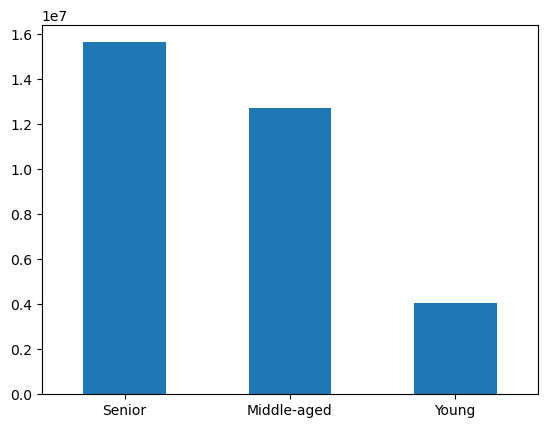

In [54]:
# Create a bar chart

age_profile_bar = df_merged['age_profile'].value_counts().plot.bar(rot=0)

In [55]:
# Export the chart

age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

#### income_profile Chart

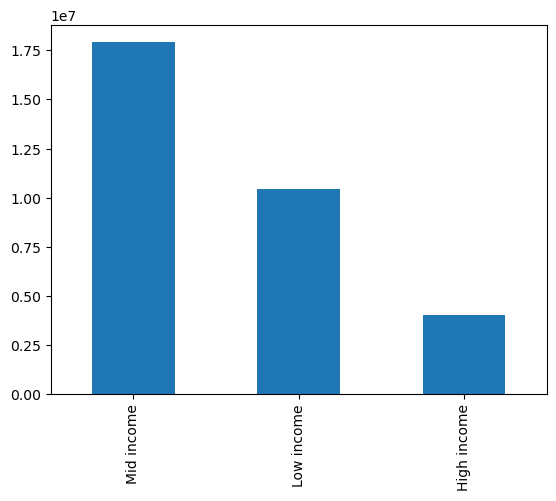

In [56]:
# Create a bar chart

income_profile_bar = df_merged['income_profile'].value_counts().plot.bar()

In [57]:
# Export the Chart

income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

#### diet_profile Chart

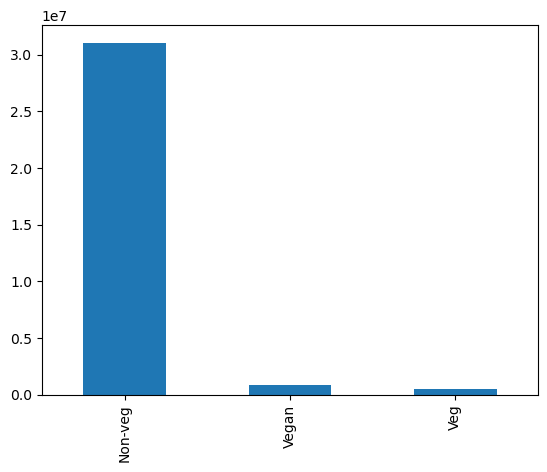

In [58]:
# Create a bar chart

diet_profile_bar = df_merged['diet_profile'].value_counts().plot.bar()

In [59]:
# Export the Chart

diet_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_profile_bar.png'))

#### family_profile Chart

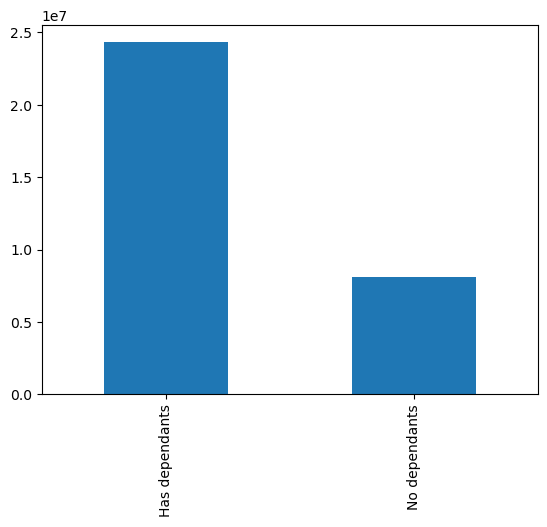

In [60]:
# Create a bar chart

family_profile_bar = df_merged['dependants'].value_counts().plot.bar()

In [61]:
# Export the Chart

family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar.png'))

## Step 7: Statistical Analysis

In [62]:
# age_profile stats

df_merged.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                              mean   max  min      mean   max  min
age_profile                                                       
Middle-aged              11.109711  30.0  0.0  7.792415  25.0  1.0
Senior                   11.102357  30.0  0.0  7.791196  25.0  1.0
Young                    11.093030  30.0  0.0  7.785748  25.0  1.0

In [63]:
# income_profile stats

df_merged.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
income_profile                                                       
High income                 10.941393  30.0  0.0  7.946928  25.0  1.0
Low income                  11.240514  30.0  0.0  7.434729  25.0  1.0
Mid income                  11.061703  30.0  0.0  7.963487  25.0  1.0

In [64]:
# diet_profile stats

df_merged.groupby('diet_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                               mean   max  min      mean   max  min
diet_profile                                                       
Non-veg                   10.945422  30.0  0.0  7.802489  25.0  1.0
Veg                       14.910948  30.0  0.0  7.476249  25.0  1.0
Vegan                     15.299300  30.0  0.0  7.555341  25.0  1.0

In [65]:
# family_profile stats

df_merged.groupby('dependants').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
dependants                                                           
Has dependants              11.111834  30.0  0.0  7.791334  25.0  1.0
No dependants               11.080805  30.0  0.0  7.789975  25.0  1.0

## Step 8 - 9: Customer Profile Analysis by Region & Department

### Regional Analysis

#### age_profile

In [66]:
# Create crosstab between 'age_profile' and 'region'

age_region_crosstab = pd.crosstab(df_merged['region'], df_merged['age_profile'], dropna = False)

In [68]:
age_region_crosstab

age_profile,Middle-aged,Senior,Young
region,,,
Midwest,3004017,3653774,939534
Northeast,2228072,2783552,711112
South,4239919,5175301,1376665
West,3245028,4030007,1017878


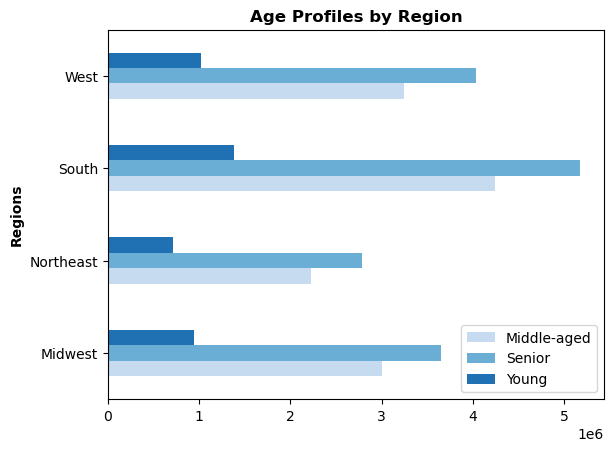

In [72]:
# Create a bar chart

age_region_bar = age_region_crosstab.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Age Profiles by Region', fontweight = 'bold')
plt.show()

In [73]:
# Export the Chart

age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

#### income_profile

In [74]:
# Create crosstab between 'income_profile' and 'region'

income_region_crosstab = pd.crosstab(df_merged['region'], df_merged['income_profile'], dropna = False)

In [75]:
income_region_crosstab

income_profile,High income,Low income,Mid income
region,,,
Midwest,955948,2427882,4213495
Northeast,706788,1822149,3193799
South,1342212,3492975,5956698
West,1046633,2699760,4546520


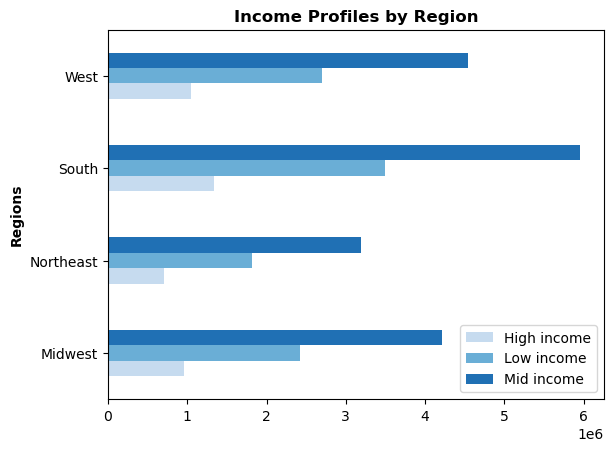

In [119]:
# Create a bar chart

income_region_bar = income_region_crosstab.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Income Profiles by Region', fontweight = 'bold')
plt.show()

In [120]:
# Export the Chart

income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

#### diet_profile

In [78]:
# Create crosstab between 'diet_profile' and 'region'

diet_region_crosstab = pd.crosstab(df_merged['region'], df_merged['diet_profile'], dropna = False)

In [79]:
diet_region_crosstab

diet_profile,Non-veg,Veg,Vegan
region,,,
Midwest,7287957,124109,185259
Northeast,5487408,94568,140760
South,10354409,171248,266228
West,7937202,138938,216773


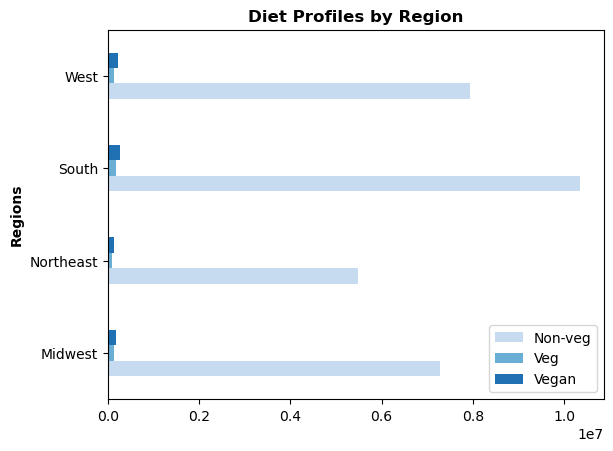

In [121]:
# Create a bar chart

diet_region_bar = diet_region_crosstab.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Diet Profiles by Region', fontweight = 'bold')
plt.show()

In [122]:
# Export the Chart

diet_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_region_bar.png'))

#### family_profile

In [82]:
# Create crosstab between 'dependants' and 'region'

family_region_crosstab = pd.crosstab(df_merged['region'], df_merged['dependants'], dropna = False)

In [83]:
family_region_crosstab

dependants,Has dependants,No dependants
region,,
Midwest,5692125,1905200
Northeast,4304435,1418301
South,8090226,2701659
West,6220570,2072343


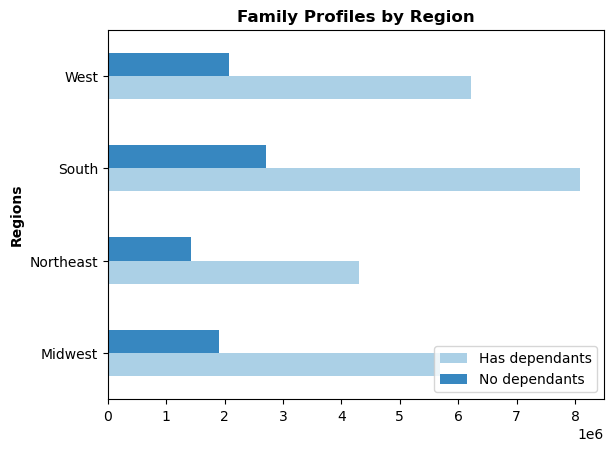

In [123]:
# Create a bar chart

family_region_bar = family_region_crosstab.plot(kind = 'barh', color = sns.color_palette('Blues', 2))
plt.legend(loc='lower right')
plt.ylabel('Regions', fontweight = 'bold')
plt.title('Family Profiles by Region', fontweight = 'bold')
plt.show()

In [124]:
# Export the Chart

diet_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_region_bar.png'))

### Depertment Analysis

#### Adding department name to the dataframe against department_id

In [93]:
df_dep

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [94]:
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [99]:
# Create the department_flag

department_flag = []
for x in df_merged['department_id'].tolist():
    if x == 1:
        department_flag.append('frozen')
    elif x == 2:
        department_flag.append('other')
    elif x == 3:
        department_flag.append('bakery')
    elif x == 4:
        department_flag.append('produce')
    elif x == 5:
        department_flag.append('alcohol')
    elif x == 6:
        department_flag.append('international')
    elif x == 7:
        department_flag.append('beverages')
    elif x == 8:
        department_flag.append('pets')
    elif x == 9:
        department_flag.append('dry goods pasta')
    elif x == 10:
        department_flag.append('bulk')
    elif x == 11:
        department_flag.append('personal care')
    elif x == 12:
        department_flag.append('meat seafood')
    elif x == 13:
        department_flag.append('pantry')
    elif x == 14:
        department_flag.append('breakfast')
    elif x == 15:
        department_flag.append('canned goods')
    elif x == 16:
        department_flag.append('dairy eggs')
    elif x == 17:
        department_flag.append('household')
    elif x == 18:
        department_flag.append('babies')
    elif x == 19:
        department_flag.append('snacks')
    elif x == 20:
        department_flag.append('deli')    
    elif x == 21:
        department_flag.append('missing')
    else:
        print('Weird value:', row)

In [100]:
# Add department_flag to the dataframe

df_merged['department'] = department_flag

In [101]:
# Check for the output

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Marital Status,income,region,low_order_flag,age_profile,income_profile,diet_profile,dependants,family_profile,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,South,High_activity customer,Middle-aged,Low income,Non-veg,Has dependants,dependants,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,South,High_activity customer,Middle-aged,Low income,Non-veg,Has dependants,dependants,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,South,High_activity customer,Middle-aged,Low income,Non-veg,Has dependants,dependants,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,South,High_activity customer,Middle-aged,Low income,Non-veg,Has dependants,dependants,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,South,High_activity customer,Middle-aged,Low income,Non-veg,Has dependants,dependants,beverages


#### age_profile

In [103]:
# Create crosstab between 'age_profile' and 'department'

age_dep_crosstab = pd.crosstab(df_merged['department'], df_merged['age_profile'], dropna = False)

In [104]:
age_dep_crosstab

age_profile,Middle-aged,Senior,Young
department,,,
alcohol,60966,72319,20411
babies,169523,201268,53011
bakery,459895,566107,146426
beverages,1047132,1307904,333087
breakfast,275497,338022,89514
bulk,13690,16461,4422
canned goods,419250,515318,133490
dairy eggs,2131351,2592536,674860
deli,412668,508081,130500


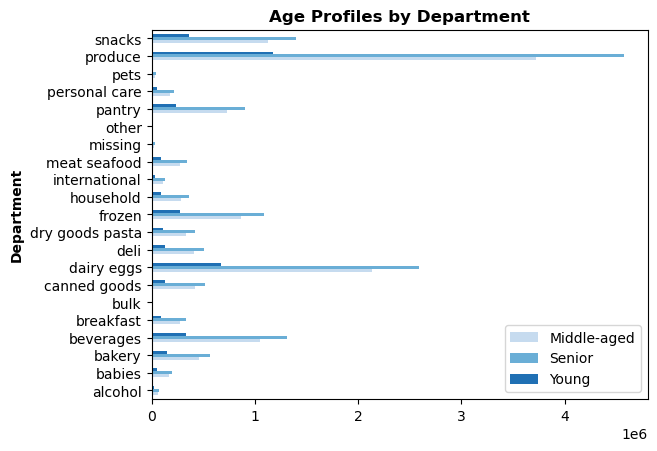

In [133]:
# Create a bar chart

age_dep_bar = age_dep_crosstab.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Age Profiles by Department', fontweight = 'bold')
plt.show()

In [134]:
# Export the Chart

age_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dep_bar.png'))

#### income_profile

In [107]:
# Create crosstab between 'income_profile' and 'region'

income_dep_crosstab = pd.crosstab(df_merged['department'], df_merged['income_profile'], dropna = False)

In [108]:
income_dep_crosstab

income_profile,High income,Low income,Mid income
department,,,
alcohol,24953,48180,80563
babies,54433,119538,249831
bakery,154054,360332,658042
beverages,325147,958035,1404941
breakfast,86857,245791,370385
bulk,3773,12369,18431
canned goods,138758,314806,614494
dairy eggs,684341,1680064,3034342
deli,131002,336307,583940


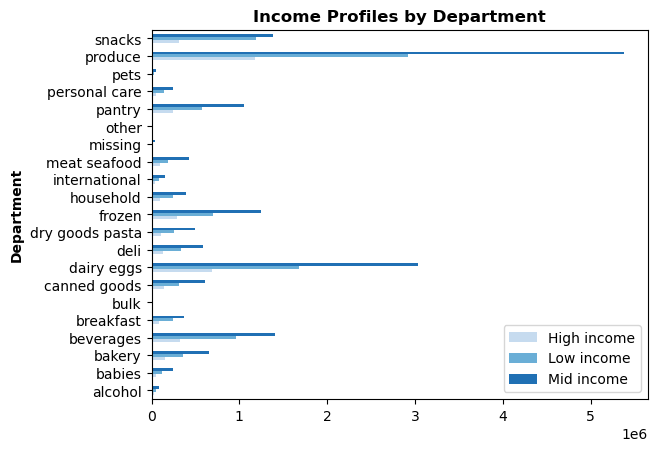

In [131]:
# Create a bar chart

income_dep_bar = income_dep_crosstab.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Income Profiles by Department', fontweight = 'bold')
plt.show()

In [132]:
# Export the Chart

income_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dep_bar.png'))

#### diet_profile

In [111]:
# Create crosstab between 'diet_profile' and 'department'

diet_dep_crosstab = pd.crosstab(df_merged['department'], df_merged['diet_profile'], dropna = False)

In [112]:
diet_dep_crosstab

diet_profile,Non-veg,Veg,Vegan
department,,,
alcohol,132302,10725,10669
babies,410916,6333,6553
bakery,1133791,14862,23775
beverages,2505814,83265,99044
breakfast,672080,13904,17049
bulk,32889,521,1163
canned goods,1042732,9725,15601
dairy eggs,5184064,76668,138015
deli,1011496,13474,26279


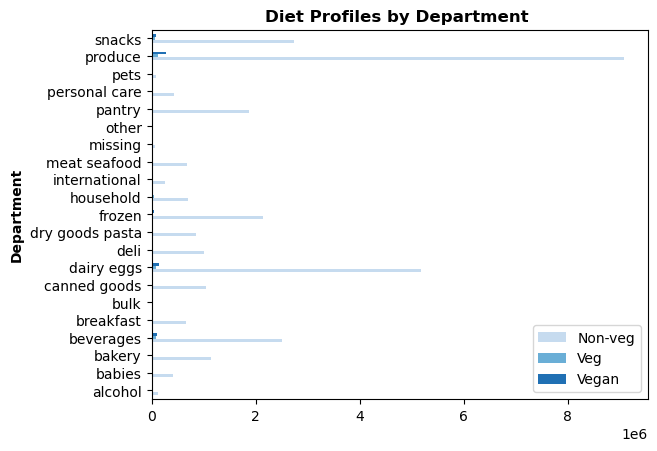

In [129]:
# Create a bar chart

diet_dep_bar = diet_dep_crosstab.plot(kind = 'barh', color = sns.color_palette('Blues', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Diet Profiles by Department ', fontweight = 'bold')
plt.show()

In [130]:
# Export the Chart

diet_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_dep_bar.png'))

#### family_profile

In [115]:
# Create crosstab between 'dependants' and 'department'

family_dep_crosstab = pd.crosstab(df_merged['department'], df_merged['dependants'], dropna = False)

In [116]:
family_dep_crosstab

dependants,Has dependants,No dependants
department,,
alcohol,114578,39118
babies,317308,106494
bakery,878023,294405
beverages,2013681,674442
breakfast,528456,174577
bulk,26295,8278
canned goods,803220,264838
dairy eggs,4049385,1349362
deli,786104,265145


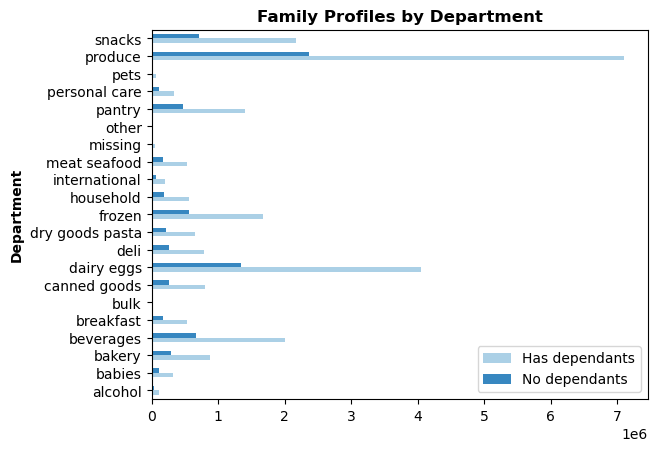

In [136]:
# Create a bar chart

family_dep_bar = family_dep_crosstab.plot(kind = 'barh', color = sns.color_palette('Blues', 2))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.title('Family Profiles by Department', fontweight = 'bold')
plt.show()

In [137]:
# Export the Chart

family_dep_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_dep_bar.png'))